In [22]:
# Import the modules
import pandas as pd
from sklearn.cluster import KMeans

In [23]:
# Read in the CSV file as a pandas DataFrame and set the "year" column as the index.
used_car_sales_df = pd.read_csv("Resources/used-car-sales-data.csv", index_col="year")

# Review the DataFrame
used_car_sales_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage
year,,,,,,,
2017,440000,45000,1,1,1,1,20.14
2016,400000,40000,1,1,1,1,18.15
2016,778000,70000,2,1,1,2,24.52
2016,680000,100000,2,1,1,1,22.54
2017,950000,50000,2,1,1,1,25.50


In [24]:
# Create a list to store inertia values
inertia = []

# Create a list to store the values of k
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
    k_model.fit(used_car_sales_df)
    inertia.append(k_model.inertia_)

In [25]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,4.087386e+15
1,2,8.901155e+14
2,3,4.300803e+14
3,4,2.472239e+14
4,5,1.776947e+14


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

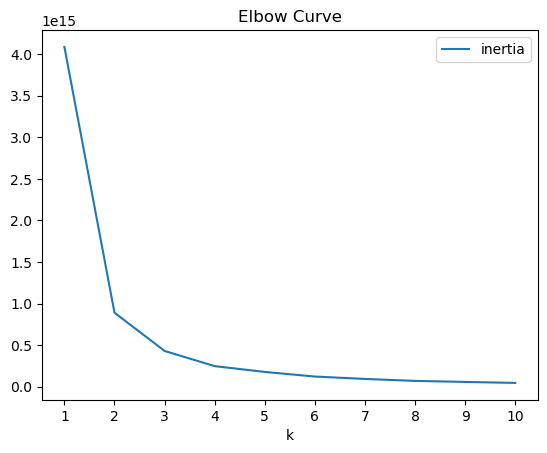

In [26]:
# Plot the Elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

### Perform the following tasks for each of the two most likely values of `k`:

* Define a K-means model using `k` to define the clusters, fit the model, make predictions, and add the prediction values to a copy of the scaled DataFrame and call it `used_car_sales_predictions_df`.

* Plot the clusters. The x-axis should reflect home "selling_price", and the y-axis should reflect the "km_driven".

In [27]:
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters=3, n_init='auto', random_state=1)

# Fit the model
model.fit(used_car_sales_df)

# Make predictions
car_sales_segment_3 = model.predict(used_car_sales_df)

# Create a copy of the DataFrame and name it as used_car_sales_predictions_df
used_car_sales_predictions_df = used_car_sales_df.copy()

# Add a class column with the labels to the used_car_sales_predictions_df DataFrame
used_car_sales_predictions_df['car_sales_segment_3'] = car_sales_segment_3

In [29]:
# Display the updated DataFrame.
used_car_sales_predictions_df.head(3)

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,car_sales_segment_3
year,,,,,,,,
2017,440000,45000,1,1,1,1,20.14,0
2016,400000,40000,1,1,1,1,18.15,0
2016,778000,70000,2,1,1,2,24.52,0


In [38]:
# used_car_sales_predictions_df.km_driven.value_counts()

<Axes: xlabel='selling_price', ylabel='km_driven'>

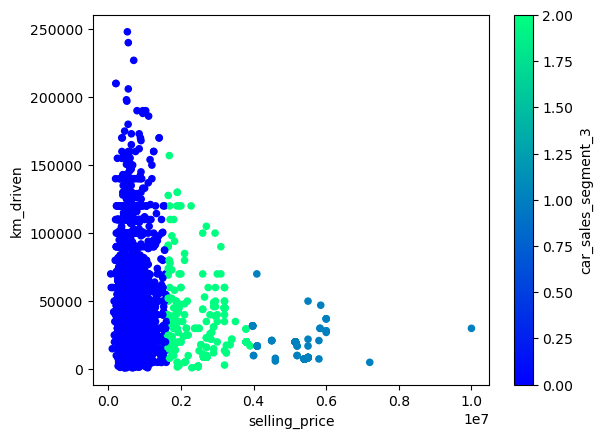

In [30]:
# Plot the clusters with "selling_price" vs. "km_driven".
used_car_sales_predictions_df.plot.scatter(
    x="selling_price",
    y="km_driven",
    c="car_sales_segment_3",
    colormap="winter")

In [40]:
# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

# Fit the model
model.fit(used_car_sales_df)

# Make predictions
car_sales_segment_4 = model.predict(used_car_sales_df)

# Add a class column with the labels to the used_car_sales_predictions_df DataFrame
used_car_sales_predictions_df['car_sales_segment_4'] = car_sales_segment_4

In [41]:
# from sklearn import metrics
# score = metrics.calinski_harabasz_score(used_car_sales_df, list(car_sales_segment_4))  
# score

<Axes: xlabel='selling_price', ylabel='km_driven'>

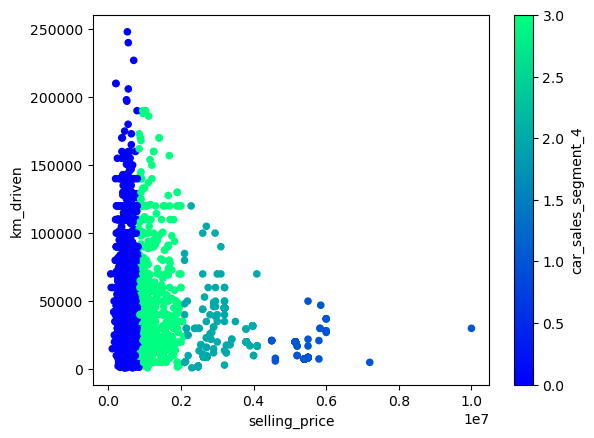

In [42]:
# Plot the clusters with "selling_price" vs. "km_driven".
used_car_sales_predictions_df.plot.scatter(
    x="selling_price",
    y="km_driven",
    c="car_sales_segment_4",
    colormap="winter")

### Answer the following question

* Is the data segmented better into three or four clusters? Why? 

From the scatterplots, it appears that the optimal value for k, is probably 4. The lower kilometers driven matters more as the price of the used vehicle increases, whereas if the price is low the number of kilometers driven doesn't matter.